![Classification Example - RF](./images/example_classification_rf.png)

# Classification Example - Random Forest

Cancer dataset used for binary classification.

![Iris flower dataset](./images/example_classification_cancer_random.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , precision_score, recall_score, auc,roc_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.tree import export_graphviz
import graphviz
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV

## 1. Data Collection

In [3]:
# load dataset
from sklearn.datasets import load_breast_cancer
?load_breast_cancer

Signature: load_breast_cancer(*, return_X_y=False, as_frame=False)
Docstring:
Load and return the breast cancer wisconsin dataset (classification).

The breast cancer dataset is a classic and very easy binary classification
dataset.

=================   ==============
Classes                          2
Samples per class    212(M),357(B)
Samples total                  569
Dimensionality                  30
Features            real, positive
=================   ==============

The copy of UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is
downloaded from:
https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Read more in the :ref:`User Guide <breast_cancer_dataset>`.

Parameters
----------
return_X_y : bool, default=False
    If True, returns ``(data, target)`` instead of a Bunch object.
    See below for more information about the `data` and `target` object.

    .. versionadded:: 0.18

as_frame : bool, default=False
    If True, the data is a pandas DataFrame i

In [4]:
X, y = load_breast_cancer(return_X_y=True)

In [6]:
X.shape

(569, 30)

## 2. Data Exploration and Preparation

#### Data Exploration

In [7]:
data = load_breast_cancer()

In [149]:
df = pd.DataFrame(data["data"], columns=data["feature_names"])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [150]:
df["target"] = data["target"]
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [152]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [153]:
# Check for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

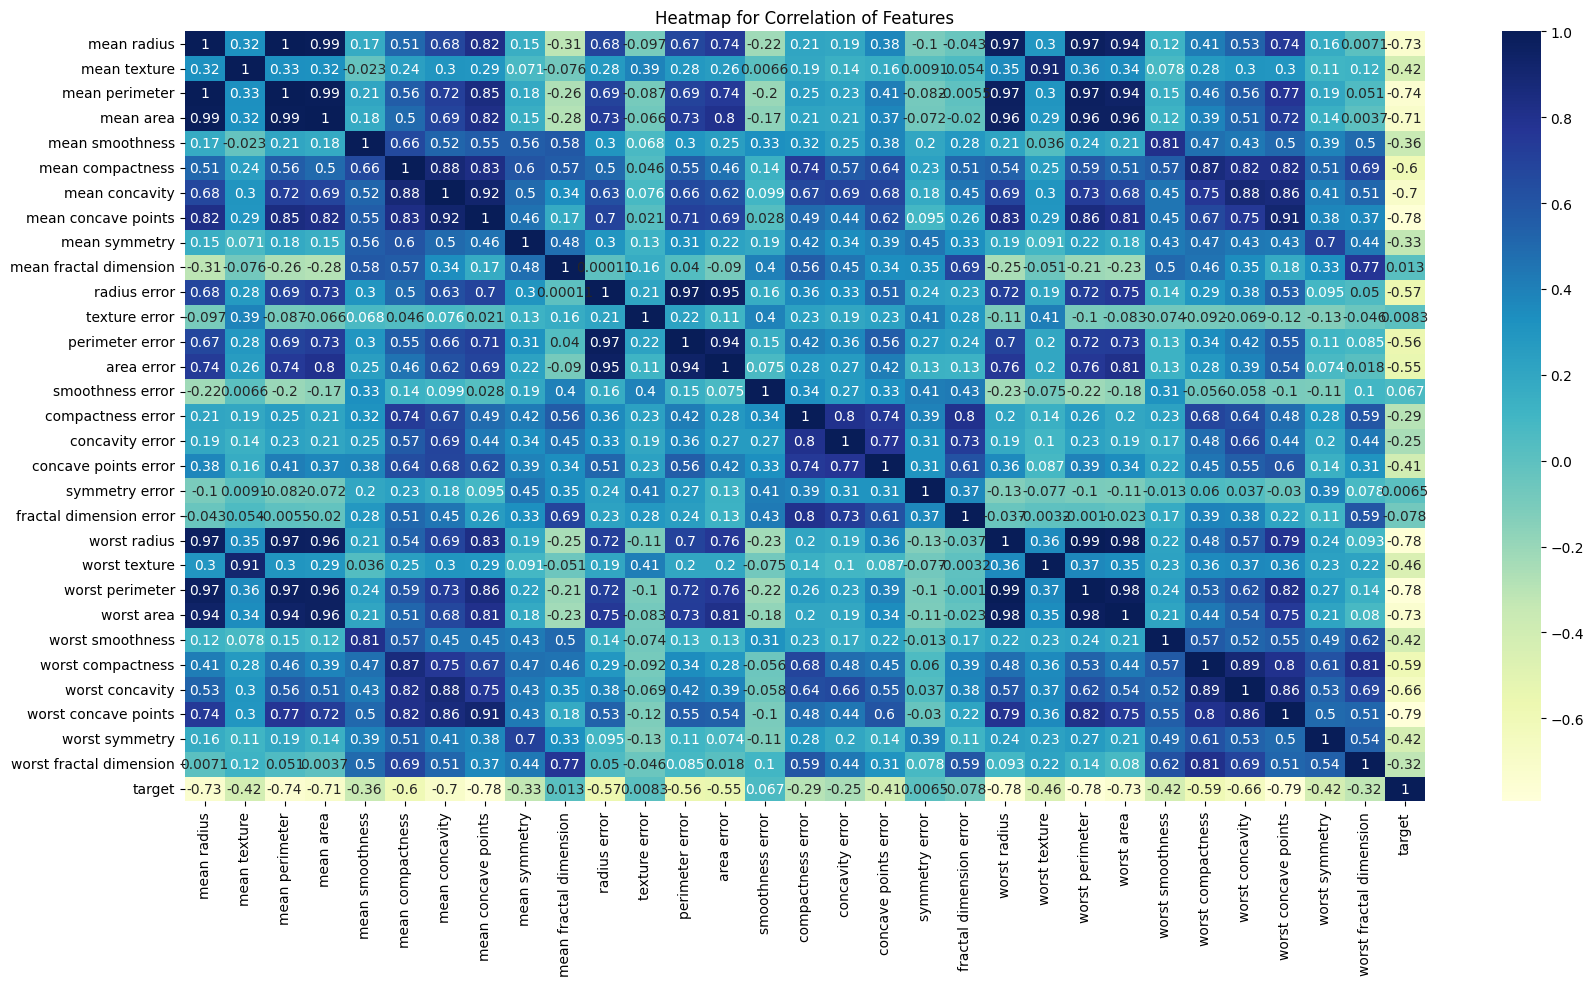

In [156]:
# Heatmap
ax = plt.figure(figsize=(20,10))
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)
ax.axes[0].set_title('Heatmap for Correlation of Features');

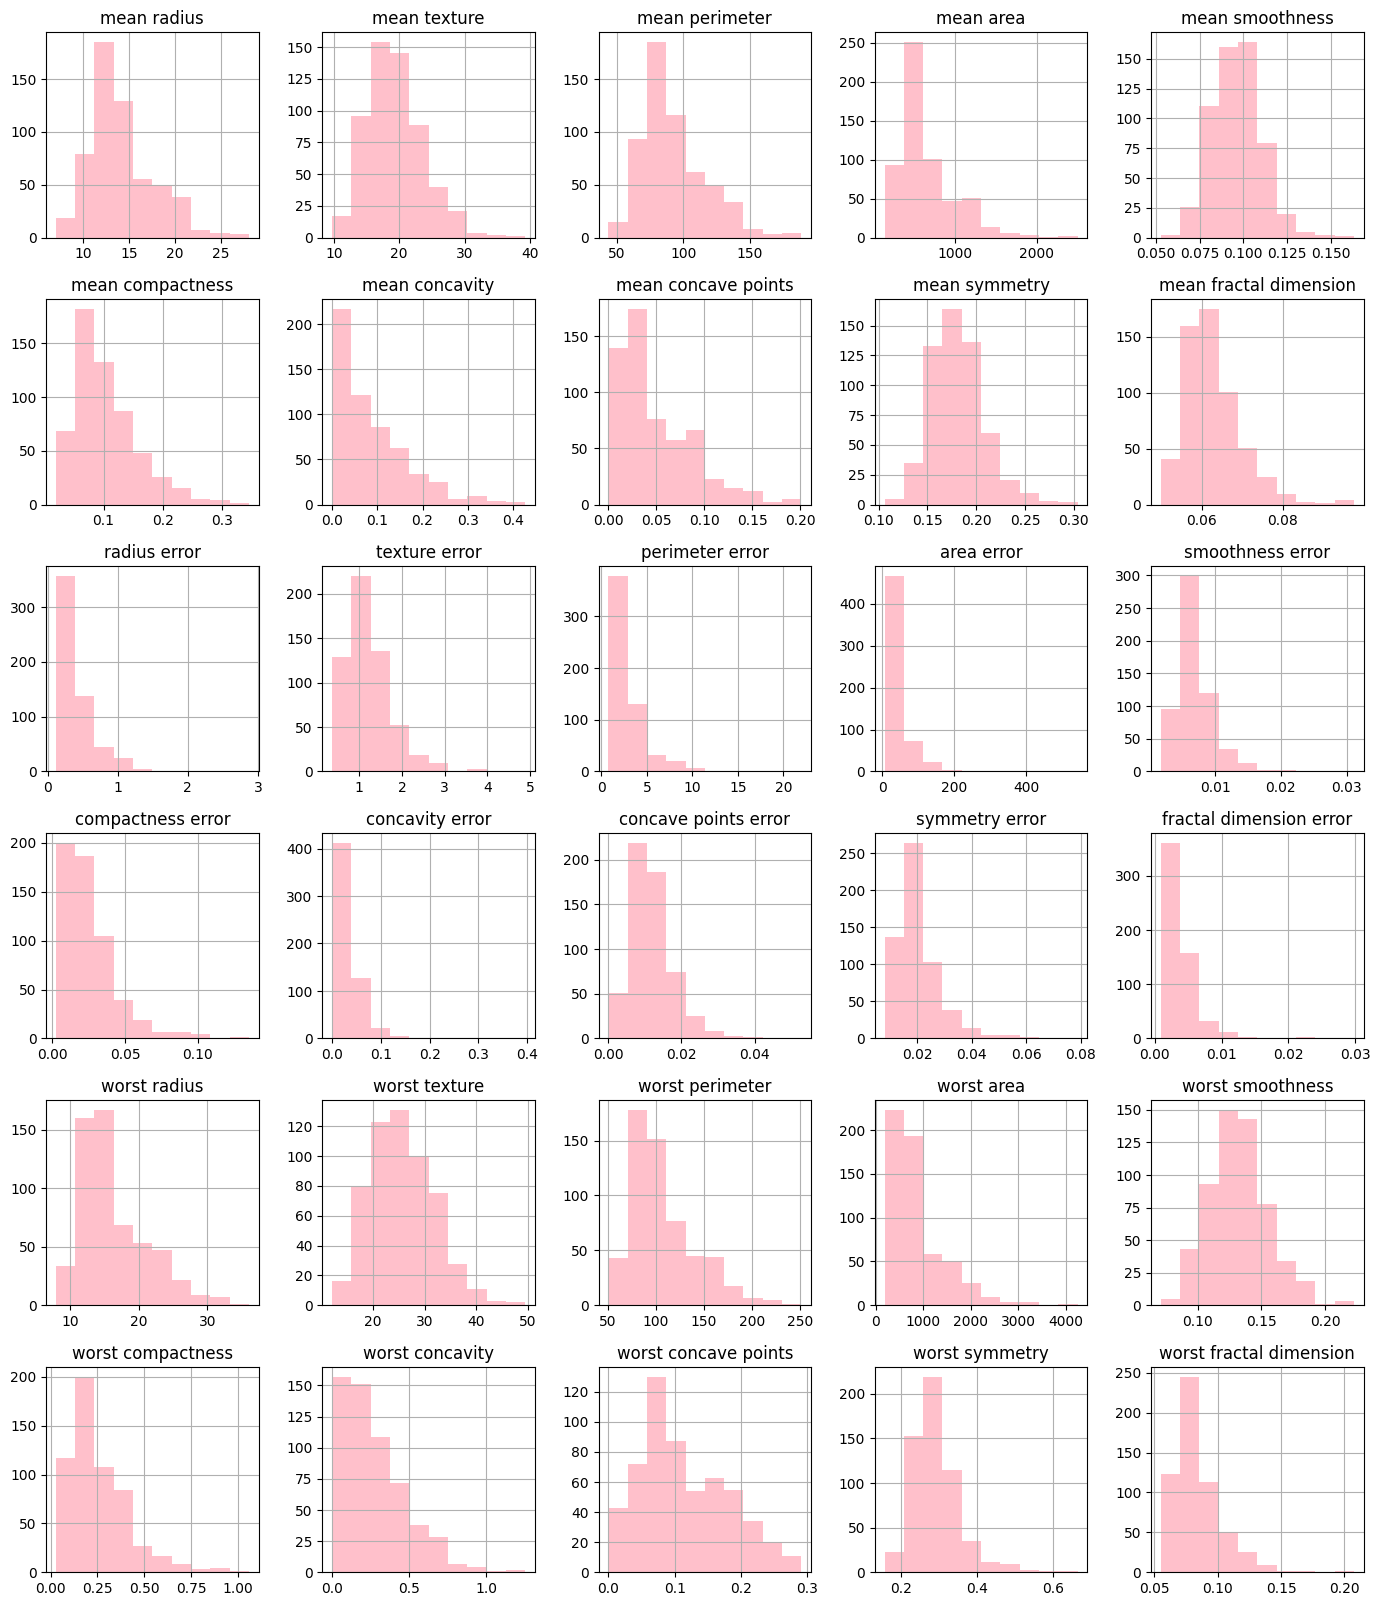

In [161]:
df[df.columns[:-1]].hist(figsize=(17,20), color='Pink')
plt.show()

#### Data Preparation/Cleaning

Not necessary because it is clean already

## 3. Split Data into Training and Test Sets

In [4]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 4. Choose an algorithm

### Random Forest

![Example Classification SVM](./images/example_classification_random_forest.png)

The Random Forest algorithm is an **ensemble learning** method that combines **multiple decision trees** to improve predictive performance and reduce overfitting. Here's how it works:

How the Random Forest Algorithm Works
1. **Bootstrap Sampling**: The algorithm starts by creating multiple bootstrap samples from the original dataset. Each bootstrap sample is a random sample with replacement from the original data.
2. **Decision Tree Training**: For each bootstrap sample, an unpruned decision tree is trained. However, when splitting a node during the construction of the tree, the split is chosen from a random subset of features rather than considering all features. This randomness introduces variation among the trees.
3. **Prediction from Ensemble**: To make a prediction for a new data instance:
    - For **classification problems**, each tree casts a vote for the predicted class, and the final prediction is the class with the most votes across all trees.
    - For **regression problems**, the predictions from all trees are averaged to obtain the final prediction.

The key aspects that make Random Forests effective are:
- **Bootstrap Sampling** - Building trees on different bootstrap samples introduces variation and reduces overfitting compared to a single tree on the full dataset.
- **Random Feature Selection** - Randomly selecting a subset of features for splitting nodes further increases diversity among trees and improves generalization.
- **Ensemble Learning** - Combining predictions from multiple trees reduces the individual trees' variance and bias, leading to more accurate and robust predictions.

Random Forests are widely used due to their high accuracy, ability to handle high-dimensional data, robustness to outliers and noise, and ease of parallelization. They are applicable in various domains, including banking, healthcare, e-commerce, and stock market analysis

## 5. Train the model

In [5]:
rfc = RandomForestClassifier(
    n_estimators=300,
    max_depth=5,
    random_state=42
)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=300, random_state=42)

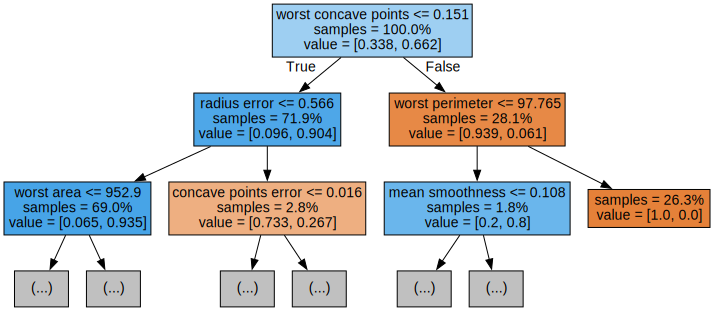

In [7]:
tree = rfc.estimators_[0]
dot_data =  export_graphviz(
    tree,
    feature_names=load_breast_cancer().feature_names,
    filled=True,
    max_depth=2, 
    impurity=False, 
    proportion=True
)
graph = graphviz.Source(dot_data)
display(graph)

/var/folders/j6/49jtsgn133d6s8dv47w194k80000gn/T/ipykernel_72620/2514416275.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


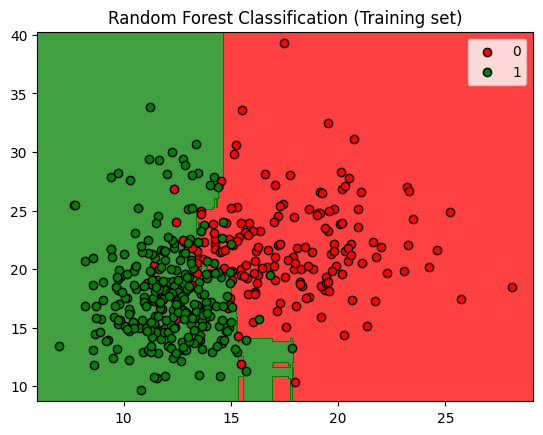

In [8]:
# Visualizing the train results
X_set, y_set = X_train[:,0:2], y_train
rfc.fit(X_set, y_set)
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Define a custom colormap
cmap = ListedColormap(['red', 'green'])

plt.contourf(X1, X2, rfc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=cmap(i), label=j, edgecolors='k', linewidths=1)
plt.title('Random Forest Classification (Training set)')
plt.legend()
plt.show()

In [121]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

## 6. Evaluate Model Performance

In [122]:
y_pred = rfc.predict(X_test)

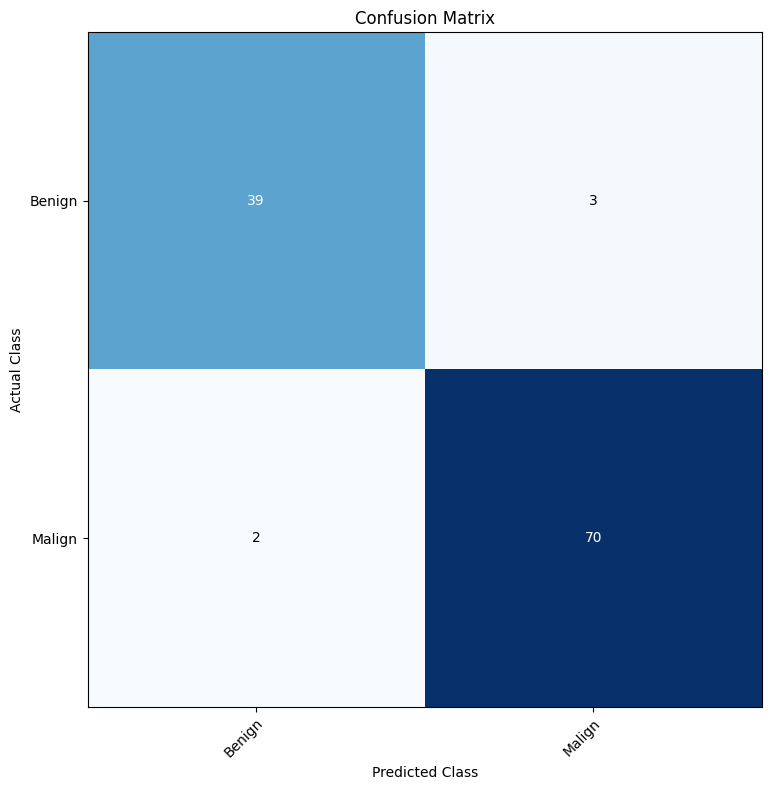

In [123]:
cm = confusion_matrix(y_test, y_pred)
classes = ["Benign", "Malign"]

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='Actual Class',
       xlabel='Predicted Class')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

ax.set_ylim(len(classes) - 0.5, -0.5)  # Adjust for correct label orientation

fig.tight_layout()
plt.show()

In [124]:
tn, fp, fn, tp = cm.ravel()

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
true_positive_rate = tp / (tp + fn)
negative_predictive_rate = tn / (tn + fn)
specificity = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1 = 2*precision*recall/(precision+recall)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"True Positive Rate: {true_positive_rate:.2f}")
print(f"Negative Predictive Rate: {negative_predictive_rate:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Precision: 0.96
Recall: 0.97
True Positive Rate: 0.97
Negative Predictive Rate: 0.95
Specificity: 0.93
F1-Score: 0.97
Accuracy: 0.96


In [125]:
# Get predicted probabilities on test set
y_proba = rfc.predict_proba(X_test)[:, 1]
y_proba[:4]

array([0.  , 1.  , 0.12, 0.28])

In [126]:
# Calculate false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07142857, 0.07142857, 0.0952381 ,
       0.11904762, 0.21428571, 0.26190476, 0.33333333, 0.35714286,
       0.47619048, 1.        ])

In [127]:
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc:.2f}')

AUC: 0.99


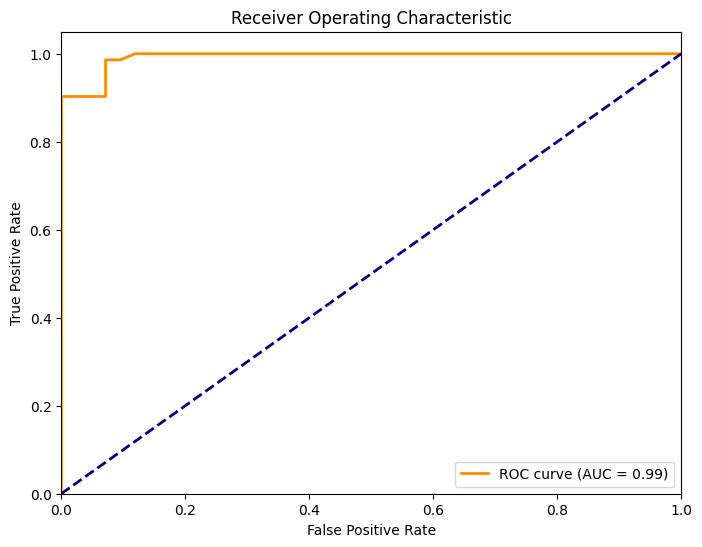

In [128]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [129]:
# Find the optimal threshold
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print(f'Optimal threshold: {optimal_threshold:.2f}')

Optimal threshold: 0.46


In [130]:
# Use the optimal threshold to make predictions
y_pred_decision = (y_proba >= optimal_threshold).astype(int)
y_pred_decision

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

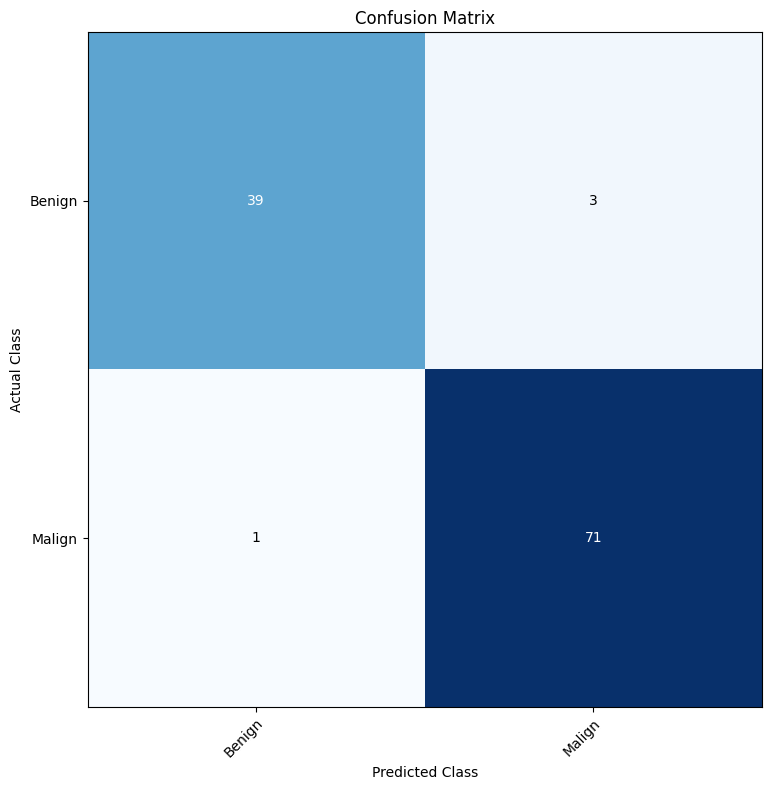

In [131]:
cm = confusion_matrix(y_test, y_pred_decision)
classes = ["Benign", "Malign"]

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='Actual Class',
       xlabel='Predicted Class')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

ax.set_ylim(len(classes) - 0.5, -0.5)  # Adjust for correct label orientation

fig.tight_layout()
plt.show()

In [134]:
tn, fp, fn, tp = cm.ravel()

# Calculate metrics
precision = precision_score(y_test, y_pred_decision)
recall = recall_score(y_test, y_pred_decision)
true_positive_rate = tp / (tp + fn)
negative_predictive_rate = tn / (tn + fn)
specificity = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1 = 2*precision*recall/(precision+recall)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"True Positive Rate: {true_positive_rate:.2f}")
print(f"Negative Predictive Rate: {negative_predictive_rate:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Precision: 0.96
Recall: 0.99
True Positive Rate: 0.99
Negative Predictive Rate: 0.97
Specificity: 0.93
F1-Score: 0.97
Accuracy: 0.96


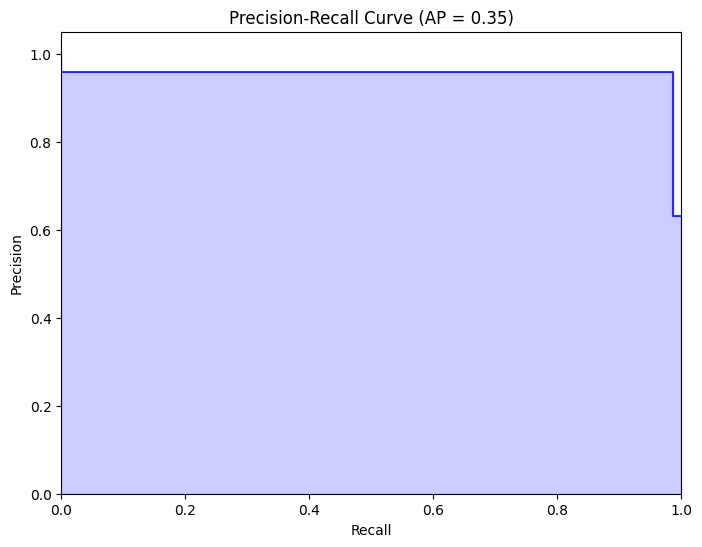

In [136]:
y_pred = rfc.predict(X_test)

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_decision)

# Calculate average precision
ap = np.trapz(recall, precision)

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.8, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP = {ap:.2f})')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

## 7. Model Tuning and Selection

Parameters that can be tweaked:

- **n_estimators**: This determines the number of trees to grow in the forest. A larger number of trees generally leads to better performance, but also increases computational cost. A good default value is often in the range of 100-500 trees.
- **max_features**: This controls the number of features to consider when looking for the best split at each node. Common values are "sqrt" (square root of total features) for classification, and "auto" (n_features / 3) for regression, where n_features is the number of input features.
- **max_depth**: This limits the maximum depth of each tree in the forest. Deeper trees can lead to overfitting, while shallower trees may underfit. Setting this parameter can help control the bias-variance tradeoff.
- **min_samples_split**: This sets the minimum number of samples required to split an internal node. Increasing this value can prevent overfitting on noisy data.
Minimum samples per leaf (min_samples_leaf): This determines the minimum number of samples required at a leaf node. Increasing this value can reduce overfitting as well.
- **bootstrap**: This controls whether bootstrap samples are used when growing trees. If False, the entire dataset is used to grow each tree.
    - **max_samples** (if bootstrap is True): this controls the maximum number/proportion of samples to draw from the total dataset for growing each tree.

In [137]:
parameters = {
    'n_estimators': [300, 400, 500],
    'max_depth': [6, 7, 8, 9],
    'criterion': ['gini'], # entropy
    'max_features': [3, 4],
    'min_samples_split': [2, 3, 4],
}

rfc_grid = GridSearchCV(
    estimator = rfc,
    param_grid = parameters,
    scoring = 'accuracy', # f1_score
    cv = 5
)

rfc_grid.fit(X_train, y_train)

print(rfc_grid.best_score_)
print(rfc_grid.best_params_)

0.964835164835165
{'criterion': 'gini', 'max_depth': 7, 'max_features': 3, 'min_samples_split': 4, 'n_estimators': 300}


In [138]:
y_pred_grid = rfc_grid.predict(X_test)
y_pred_grid

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

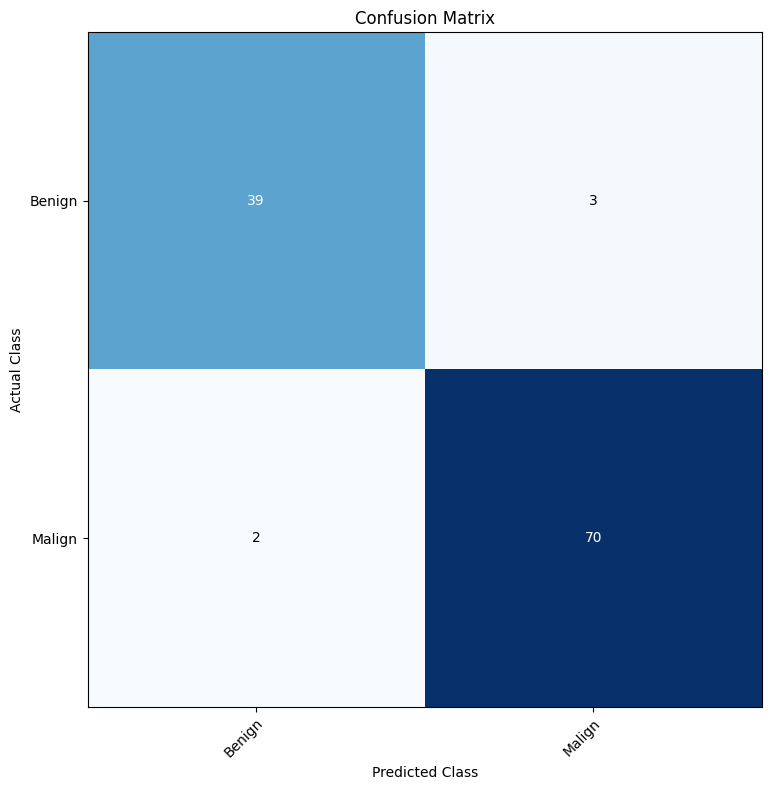

In [139]:
cm = confusion_matrix(y_test, y_pred_grid)
classes = ["Benign", "Malign"]

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='Actual Class',
       xlabel='Predicted Class')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

ax.set_ylim(len(classes) - 0.5, -0.5)  # Adjust for correct label orientation

fig.tight_layout()
plt.show()

In [140]:
tn, fp, fn, tp = cm.ravel()

# Calculate metrics
precision = precision_score(y_test, y_pred_grid)
recall = recall_score(y_test, y_pred_grid)
true_positive_rate = tp / (tp + fn)
negative_predictive_rate = tn / (tn + fn)
specificity = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1 = 2*precision*recall/(precision+recall)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"True Positive Rate: {true_positive_rate:.2f}")
print(f"Negative Predictive Rate: {negative_predictive_rate:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Precision: 0.96
Recall: 0.97
True Positive Rate: 0.97
Negative Predictive Rate: 0.95
Specificity: 0.93
F1-Score: 0.97
Accuracy: 0.96
